In [2]:
#Feature selection

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, recall_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

In [3]:
gene_expr_df = pd.read_csv("datasets/merged-combat15.csv")
outcome_df = pd.read_csv("datasets/combat15outcomes.csv")
pos_outcome_df = outcome_df[["patient_ID", "posOutcome"]].dropna(axis=0, subset=["posOutcome"])
pos_outcome_df.posOutcome = pos_outcome_df.posOutcome.astype(int)
ge_pos_outcome_df = pd.merge(pos_outcome_df, gene_expr_df, on="patient_ID")
X, y = ge_pos_outcome_df[ge_pos_outcome_df.columns.difference(["posOutcome"])], ge_pos_outcome_df["posOutcome"]

print("X shape " + str(X.shape))

X shape (2213, 8833)


In [5]:
rand_seed = 42
params = {'n_estimators': [300, 400, 500, 600, 700],
              'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.07],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'max_depth': [3, 4, 5, 6],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'min_child_weight': [1, 2, 3, 4, 5]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_seed, stratify=y)

train_df = pd.concat([y_train, X_train], axis=1)
test_df = pd.concat([y_test, X_test], axis=1)

train_df.to_csv("datasets/train.csv")
test_df.to_csv("datasets/test.csv")
X_train.drop("patient_ID", axis=1, inplace=True)
X_test.drop("patient_ID", axis=1, inplace=True)

In [ ]:
xgb_params_1 = {'subsample': 0.6,
 'n_estimators': 700,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.03,
 'gamma': 0.5,
 'colsample_bytree': 0.8}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand_seed)
clf = XGBClassifier(**xgb_params_1, n_jobs=14)
feat_selector = RFECV(clf, step=100, cv=cv, min_features_to_select=50)
feat_selector.fit(X_train, y_train)
feat_selector.ranking_


[17:37:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

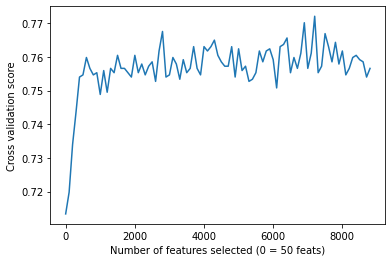

In [94]:
import matplotlib.ticker as ticker
min_features = 50
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Number of features selected (0 = 50 feats)")
ax1.set_ylabel("Cross validation score")
X = [x for x in range(0, len(feat_selector.grid_scores_))]
ax1.plot(X, feat_selector.grid_scores_)
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*100))
ax1.xaxis.set_major_formatter(ticks_x)
plt.show()

In [29]:
inds = np.argpartition(feat_selector.grid_scores_, 50)[-50:]
inds[np.argsort(feat_selector.grid_scores_[inds])]

array([38, 16, 82, 24, 46, 74, 52, 47, 79, 22, 32, 77, 45, 25, 86, 57, 60,
       34, 85, 66, 83,  6, 31, 84, 20, 15, 44, 71, 68, 56, 58, 80, 41, 27,
       59, 50, 48, 62, 76, 42, 40, 37, 63, 78, 43, 64, 75, 28, 69, 72])

In [98]:
feat_selector.grid_scores_[72]

0.772107735671782

In [100]:
ft_rank_df = pd.DataFrame(feat_selector.ranking_, index=X_train.columns,
                         columns=["Rank"]).sort_values(by="Rank",
                                                       ascending=False)

In [61]:
X_subset = X_train.loc  [:, feat_selector.support_]
X_subset.to_csv("datasets/train_subset.csv")

In [101]:
ft_rank_df.head(n=50)

,Rank
A4GALT,17
NLK,17
NKX6-1,17
NKX2-8,17
NKRF,17
NKIRAS2,17
NKG7,17
NIT2,17
NIP7,17
NINJ1,17


In [107]:
feat_selector.support_

array([False, False, False, ..., False, False, False])